# Carmax Analytics Showcase - Winter 2023

## Challenge Description

Many customers decide to trade-in their current vehicle when purchasing a vehicle at CarMax.
What does a customer's appraised vehicle tell us about the vehicle they will end up purchasing?
How can CarMax use this information to improve business operations and provide customers a personalized shopping experience?

In [1]:
# import 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from natsort import natsorted
from collections import Counter

In [2]:
# data
customer_df = pd.read_csv('../Data/ShowcaseDataWinter2023.csv')

In [3]:
customer_df.shape

(200000, 30)

In [4]:
# columns with missing values
customer_df.columns[customer_df.isna().any()].tolist()

['online_appraisal_flag',
 'trim_descrip',
 'body',
 'color',
 'mpg_city',
 'mpg_highway',
 'fuel_capacity',
 'model_appraisal',
 'trim_descrip_appraisal',
 'color_appraisal',
 'mpg_city_appraisal',
 'fuel_capacity_appraisal']

In [5]:
customer_df.isna().sum()

price                          0
appraisal_offer                0
online_appraisal_flag       3834
model_year                     0
mileage                        0
make                           0
model                          0
trim_descrip               23841
body                       10259
color                         33
engine                         0
cylinders                      0
mpg_city                     590
mpg_highway                  590
horsepower                     0
fuel_capacity                  4
model_year_appraisal           0
mileage_appraisal              0
make_appraisal                 0
model_appraisal            21508
trim_descrip_appraisal     31080
body_appraisal                 0
color_appraisal             1318
engine_appraisal               0
cylinders_appraisal            0
mpg_city_appraisal             1
mpg_highway_appraisal          0
horsepower_appraisal           0
fuel_capacity_appraisal      312
market                         0
dtype: int

In [6]:
# remove rows with missing values
customer_df_noNaN = customer_df.dropna()

In [7]:
customer_df_noNaN.shape

(128683, 30)

In [8]:
# Remove rows with 'Unknown' in color
customer_df_noNaN = customer_df_noNaN[(customer_df_noNaN['color']!='Unknown') & 
                                        (customer_df_noNaN['color_appraisal']!='Unknown')]

In [9]:
# Remove rows with 0 cylinders
df = customer_df_noNaN[customer_df_noNaN['cylinders']!=0]

In [10]:
df.shape

(127758, 30)

In [771]:
# Convert engine from string to float

# df_copy = df.copy()
# df_copy['engine'] = df_copy['engine'].str.rstrip('L').astype(float)
# df_copy['engine_appraisal'] = df_copy['engine_appraisal'].str.rstrip('L').astype(float)

In [11]:
# convert dtypes
convert_dict = {'online_appraisal_flag':'int16',
               'model_year':'int16',
                'cylinders':'int16',
                'mpg_city':'int16',
                'mpg_highway':'int16',
                'horsepower':'int16',
                'fuel_capacity':'int16',
                'market':'int16',
                'model_year_appraisal':'int16',
                'cylinders_appraisal':'int16',
                'mpg_city_appraisal':'int16',
                'mpg_highway_appraisal':'int16',
                'horsepower_appraisal':'int16',
                'fuel_capacity_appraisal':'int16',
                'market':'object'
               }

In [12]:
df = df.astype(convert_dict)

In [13]:
df.dtypes

price                      object
appraisal_offer            object
online_appraisal_flag       int16
model_year                  int16
mileage                    object
make                       object
model                      object
trim_descrip               object
body                       object
color                      object
engine                     object
cylinders                   int16
mpg_city                    int16
mpg_highway                 int16
horsepower                  int16
fuel_capacity               int16
model_year_appraisal        int16
mileage_appraisal          object
make_appraisal             object
model_appraisal            object
trim_descrip_appraisal     object
body_appraisal             object
color_appraisal            object
engine_appraisal           object
cylinders_appraisal         int16
mpg_city_appraisal          int16
mpg_highway_appraisal       int16
horsepower_appraisal        int16
fuel_capacity_appraisal     int16
market        

In [800]:
# save df
df.to_csv('../Data/processed_data.csv', index=None)

## Is there any trend in the removed rows?

In [14]:
removed_df = pd.concat([customer_df,df]).drop_duplicates(keep=False)

In [15]:
def plot_value_counts(df, nrows, ncols):
    df_copy  = df.copy()
    
    fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (10,30))
    axes = axs.ravel()
    
    cols  = df_copy.columns.tolist()
    for idx, col in enumerate(cols):
        nat_sorted_idx = natsorted(df_copy[col].value_counts().index)
        df_copy[col].reindex(nat_sorted_idx)
        df_copy[col].value_counts().sort_index().iloc[:10].plot(kind='bar', ax = axes[idx])
        axes[idx].tick_params(axis='both', which='major', labelsize=8, rotation=45)
        axes[idx].set_title(col) 
        plt.subplots_adjust(hspace=0.5, wspace=0.8)
        
    return None

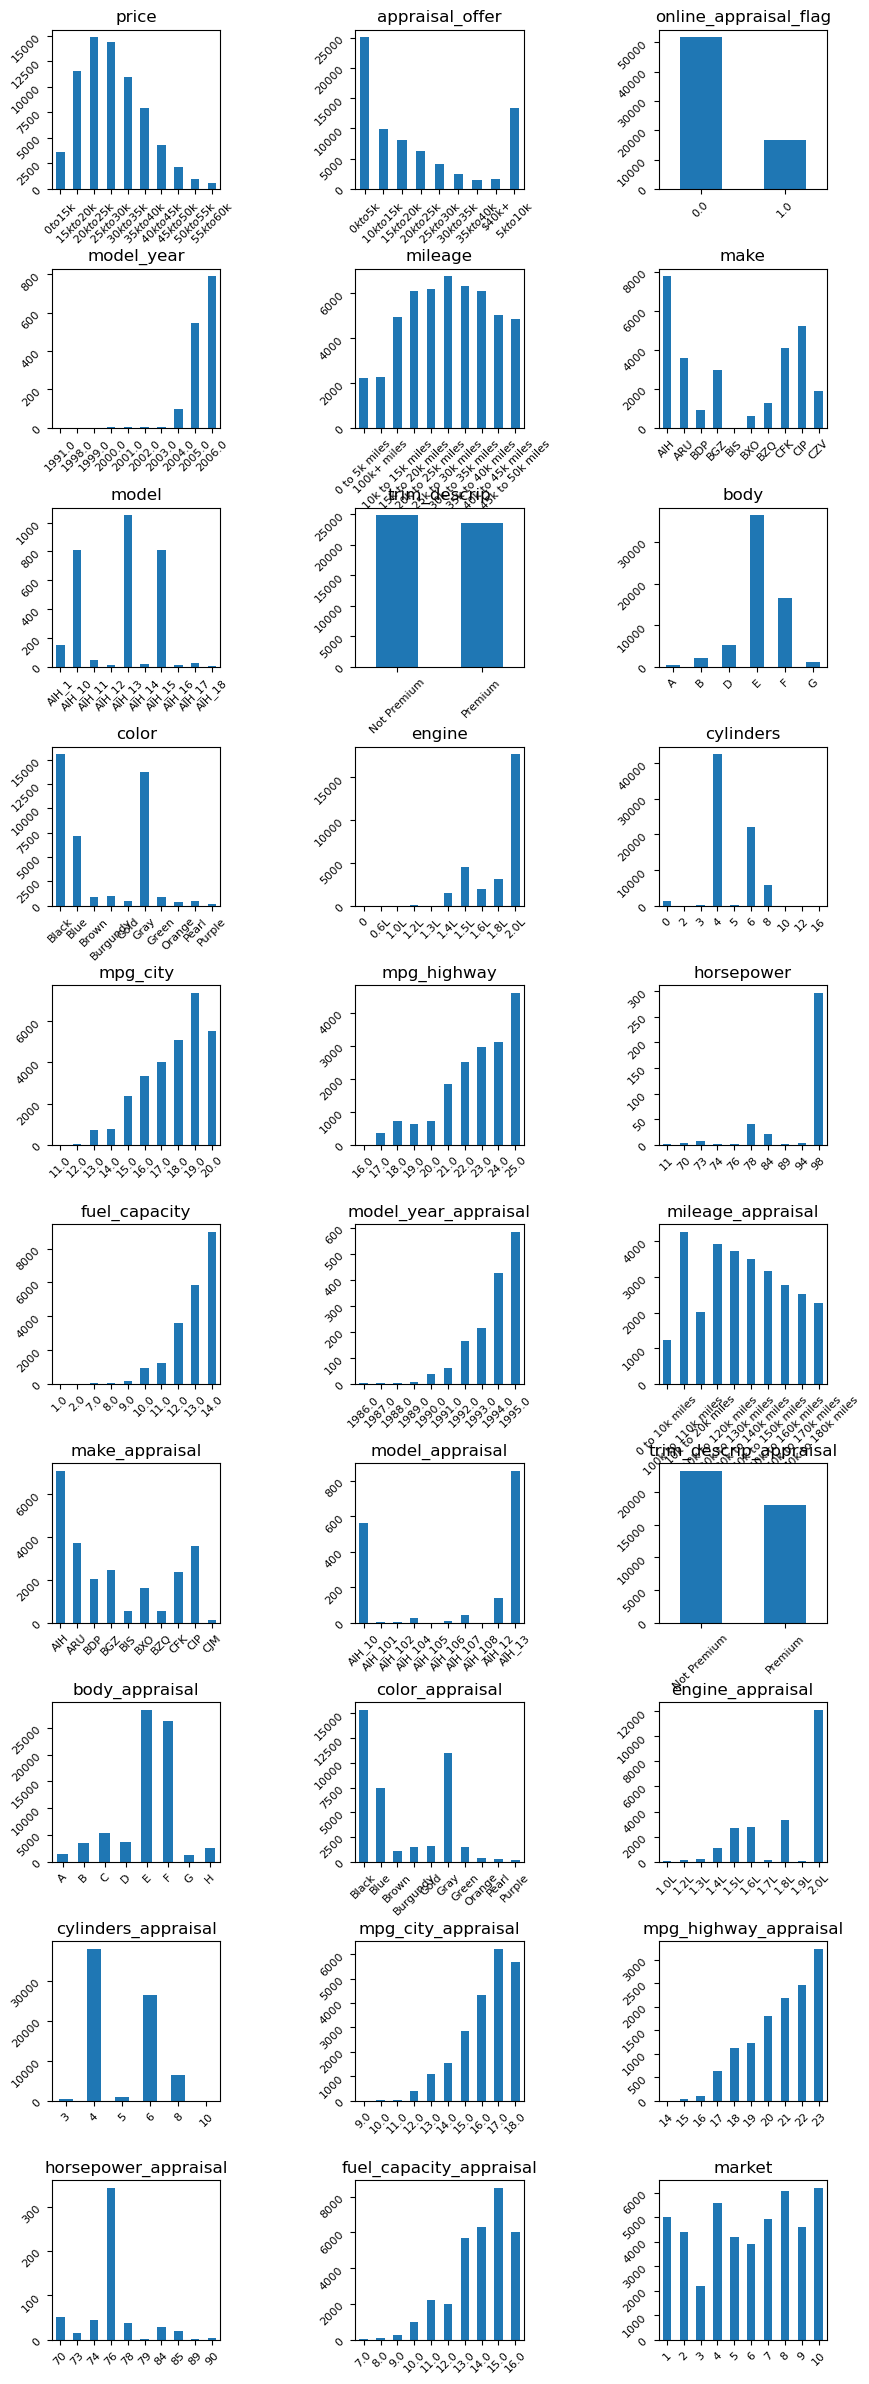

In [16]:
plot_value_counts(removed_df, 10, 3)

## Online_appraisal_flag

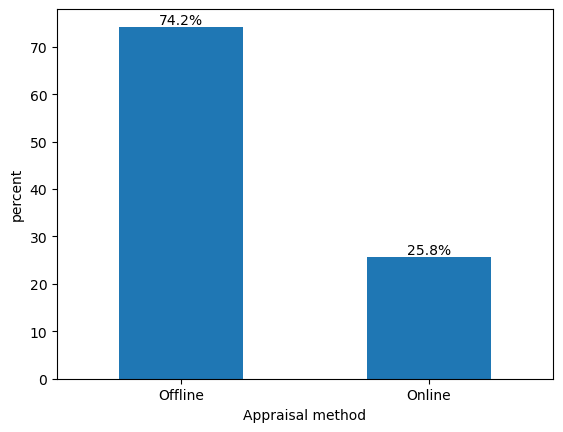

In [17]:
g = (df['online_appraisal_flag'].value_counts()/len(df)*100).plot(kind='bar')

patches = g.axes.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()
    g.axes.annotate('{:.1f}%'.format(y), (x, y+0.5), ha='center')
    
plt.ylabel('percent')
plt.xlabel('Appraisal method')
plt.xticks(ticks = [0,1], labels = ['Offline','Online'], rotation=0)
plt.savefig('../plots/online_appraisal_flag.png')

## Market

In [18]:
df['market'].nunique()

16

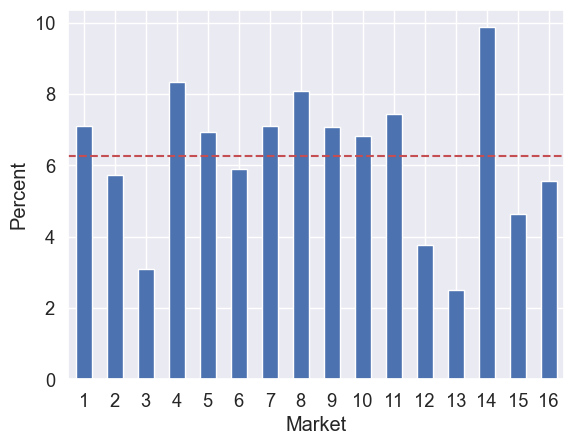

In [28]:
(df['market'].value_counts().sort_index()/len(df)*100).plot(kind='bar')
plt.axhline(y=6.25, color='r', ls='dashed' )
plt.xticks(rotation=0)
plt.xlabel('Market')
plt.ylabel('Percent')
plt.savefig('../plots/market.png')

## Appraised cars

In [19]:
# select columns relating to appraised cars
appraisal_columns = [col for col in df.columns.values if 'appraisal' in col]

In [30]:
appraisal_columns

['appraisal_offer',
 'online_appraisal_flag',
 'model_year_appraisal',
 'mileage_appraisal',
 'make_appraisal',
 'model_appraisal',
 'trim_descrip_appraisal',
 'body_appraisal',
 'color_appraisal',
 'engine_appraisal',
 'cylinders_appraisal',
 'mpg_city_appraisal',
 'mpg_highway_appraisal',
 'horsepower_appraisal',
 'fuel_capacity_appraisal']

In [20]:
appraised_cars = df[appraisal_columns]

In [21]:
appraised_cars.head()

,appraisal_offer,online_appraisal_flag,model_year_appraisal,mileage_appraisal,make_appraisal,model_appraisal,trim_descrip_appraisal,body_appraisal,color_appraisal,engine_appraisal,cylinders_appraisal,mpg_city_appraisal,mpg_highway_appraisal,horsepower_appraisal,fuel_capacity_appraisal
1,$0k to $5k,0,1996,0 to 10k miles,KQZ,KQZ_3,Not Premium,D,Gold,4.2L,6,16,21,205,25
4,$15k to $20k,1,2011,20k to 30k miles,LTX,LTX_20,Not Premium,E,Black,2.4L,4,20,29,182,18
5,$5k to $10k,0,2009,160k to 170k miles,FJE,FJE_10,Not Premium,F,Black,3.6L,6,18,27,292,19
6,$40k+,0,2012,30k to 40k miles,LTX,LTX_27,Not Premium,B,Black,6.2L,8,16,25,455,18
7,$5k to $10k,0,2010,80k to 90k miles,HXQ,HXQ_8,Not Premium,F,Silver,1.8L,4,30,39,143,13


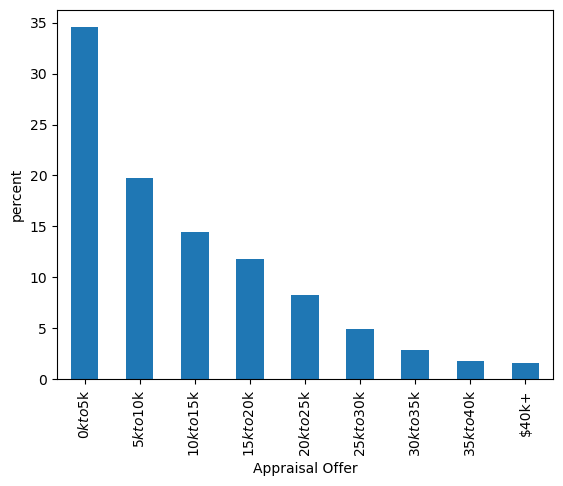

In [22]:
# appraisal_offer

appraised_cars_copy = appraised_cars.copy()
appraisal_offer_natsorted_idx = natsorted(appraised_cars_copy['appraisal_offer'].value_counts().index)
appraised_cars_copy['appraisal_offer'] = pd.Categorical(appraised_cars_copy['appraisal_offer'],
                                                        appraisal_offer_natsorted_idx)
(appraised_cars_copy['appraisal_offer'].value_counts()/len(appraised_cars_copy)*100).plot(kind='bar')
plt.ylabel('percent')
plt.xlabel('Appraisal Offer');

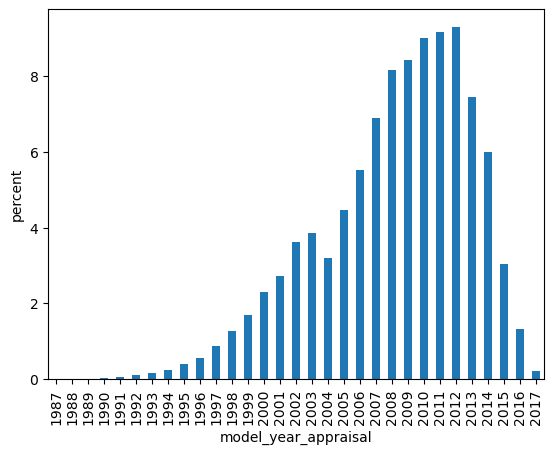

In [23]:
# model_year_appraisal

(appraised_cars['model_year_appraisal'].value_counts()/len(appraised_cars)*100).sort_index().plot(kind='bar')
plt.ylabel('percent')
plt.xlabel('model_year_appraisal');

In [25]:
np.median(appraised_cars['model_year_appraisal'])

2009.0

In [37]:
(appraised_cars['model_year_appraisal'].value_counts()/len(appraised_cars)*100).iloc[:10]

2012    9.291003
2011    9.157939
2010    9.009221
2009    8.430783
2008    8.146652
2013    7.455502
2007    6.894285
2014    6.003538
2006    5.511201
2005    4.460777
Name: model_year_appraisal, dtype: float64

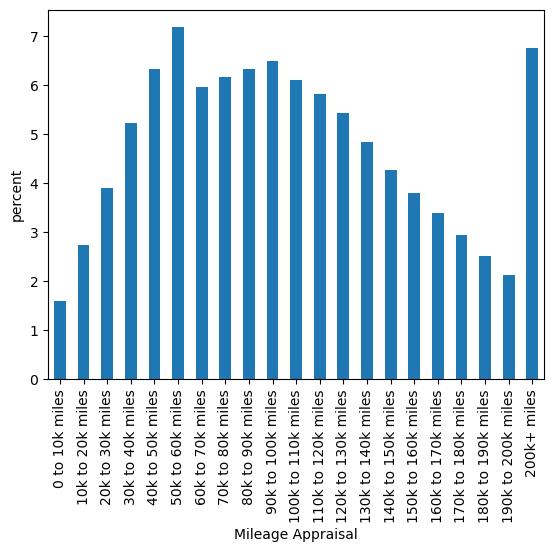

In [666]:
# mileage_appraisal
appraised_cars_copy = appraised_cars.copy()
mileage_appraisal_natsorted_idx = natsorted(appraised_cars_copy['mileage_appraisal'].\
                                            value_counts().index)
appraised_cars_copy['mileage_appraisal'] = pd.Categorical(appraised_cars_copy['mileage_appraisal'], 
                                                          mileage_appraisal_natsorted_idx)
(appraised_cars_copy['mileage_appraisal'].value_counts()/len(appraised_cars_copy)*100).\
sort_index().plot(kind='bar')
plt.ylabel('percent')
plt.xlabel('Mileage Appraisal');

In [41]:
(appraised_cars['mileage_appraisal'].value_counts()/len(appraised_cars)*100).iloc[:10].sum() - 6.770613

55.86264675672757

In [667]:
# make_appraisal
appraised_cars['make_appraisal'].nunique()

37

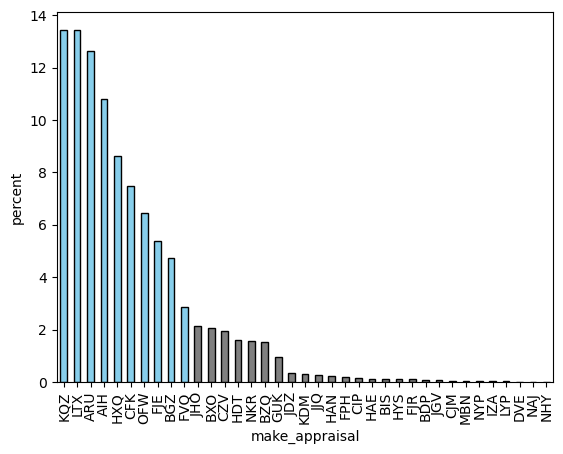

In [669]:
# make_appraisal with top 10 makes
top10_makes_color = ['skyblue']*10+['gray']*27
(appraised_cars['make_appraisal'].value_counts()/len(appraised_cars)*100).plot(kind='bar' , 
                                                                           color = top10_makes_color,
                                                                               edgecolor = 'k')
plt.xlabel('make_appraisal')
plt.ylabel('percent');

In [670]:
# model_appraisal
appraised_cars['model_appraisal'].nunique()

428

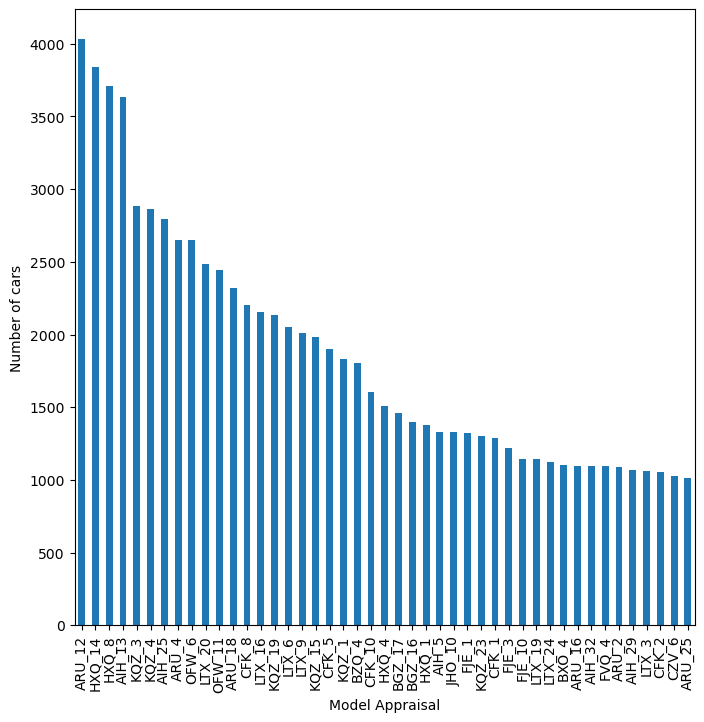

In [671]:
# Car Models with atleast 1000 cars
appraised_cars['model_appraisal'].value_counts()[appraised_cars['model_appraisal'].value_counts()>1000].plot(kind='bar',
                                                                                                            figsize=(8,8))
plt.xlabel('Model Appraisal')
plt.ylabel('Number of cars');

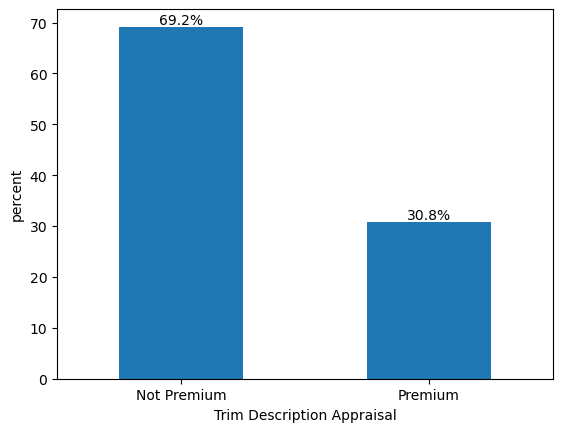

In [673]:
# trim_descrip_appraisal
g = (appraised_cars['trim_descrip_appraisal'].value_counts()/len(appraised_cars)*100).plot(kind='bar')

patches = g.axes.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()
    g.axes.annotate('{:.1f}%'.format(y), (x, y+0.5), ha='center')
    
plt.xlabel('Trim Description Appraisal')
plt.xticks(rotation=0)
plt.ylabel('percent');

In [674]:
# body_appraisal
natsorted(appraised_cars['body_appraisal'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

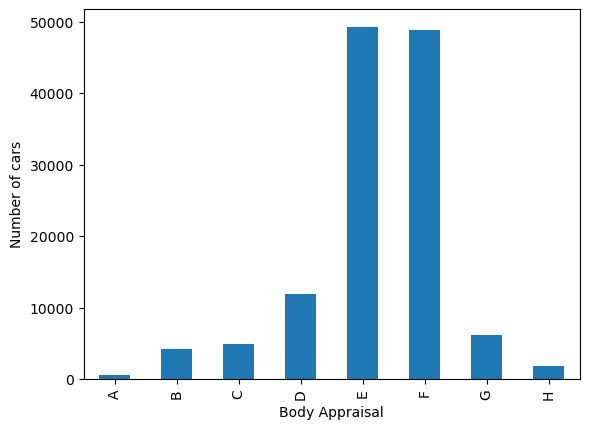

In [675]:
appraised_cars['body_appraisal'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Body Appraisal')
plt.ylabel('Number of cars');

In [676]:
# color_appraisal
appraised_cars['color_appraisal'].unique()

array(['Gold', 'Black', 'Silver', 'Blue', 'Burgundy', 'Red', 'Gray',
       'White', 'Green', 'Tan', 'Brown', 'Purple', 'Pearl', 'Yellow',
       'Orange'], dtype=object)

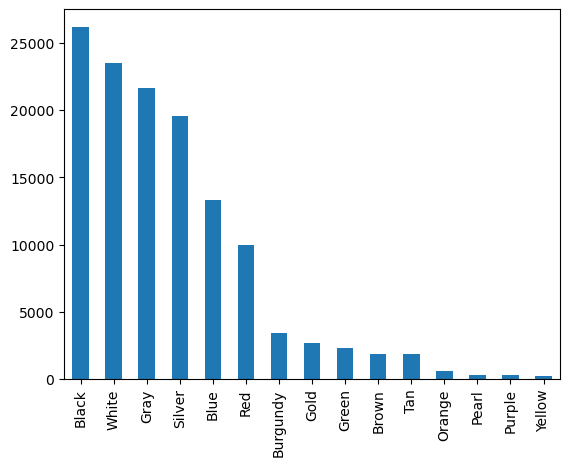

In [677]:
# 90% of all car colors

appraised_cars['color_appraisal'].value_counts().plot(kind='bar');

In [679]:
# engine
appraised_cars['engine_appraisal'].unique()

array(['4.2L', '2.4L', '3.6L', '6.2L', '1.8L', '4.7L', '1.6L', '2.5L',
       '3.5L', '5.0L', '4.8L', '2.0L', '3.8L', '1.5L', '5.3L', '3.0L',
       '5.4L', '1.4L', '5.7L', '4.6L', '3.2L', '3.7L', '2.2L', '4.3L',
       '2.3L', '4.0L', '3.3L', '4.4L', '1.0L', '1.2L', '1.7L', '2.7L',
       '3.9L', '5.6L', '2.8L', '6.4L', '3.4L', '1.3L', '2.9L', '3.1L',
       '4.5L', '5.8L', '6.0L', '2.1L', '5.2L', '5.9L', '5.5L', '6.6L'],
      dtype=object)

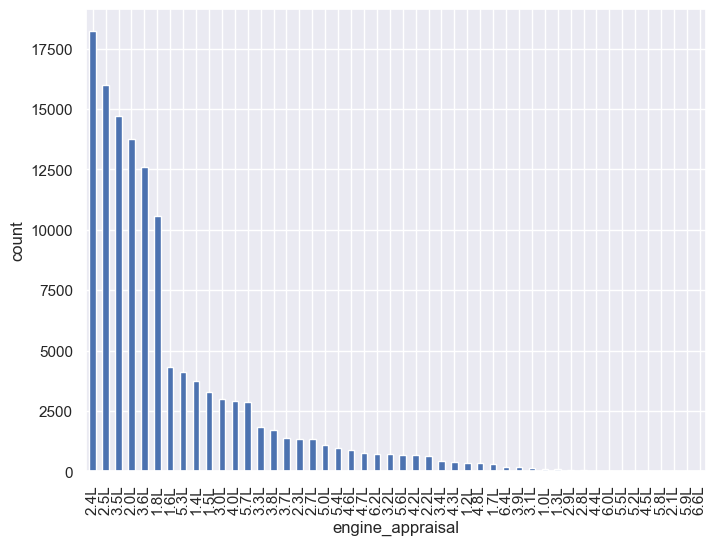

In [36]:
appraised_cars['engine_appraisal'].value_counts().plot(kind='bar', figsize=(8,6))
plt.xlabel('engine_appraisal')
plt.ylabel('count');

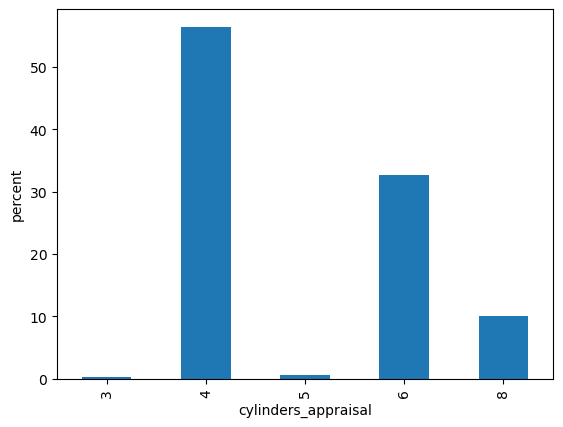

In [686]:
# cylinder_appraisal
(appraised_cars['cylinders_appraisal'].value_counts()/len(appraised_cars)*100).\
sort_index().plot(kind='bar')
plt.xlabel('cylinders_appraisal')
plt.ylabel('percent');

In [687]:
# mpg_city_appraisal
np.sort(appraised_cars['mpg_city_appraisal'].unique())

array([ 9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21.,
       22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34.,
       35., 36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47.,
       48., 49., 50., 51., 52., 53., 54., 55., 60.])

In [691]:
# median mpg_city_appraisal
appraised_cars['mpg_city_appraisal'].median()

21.0

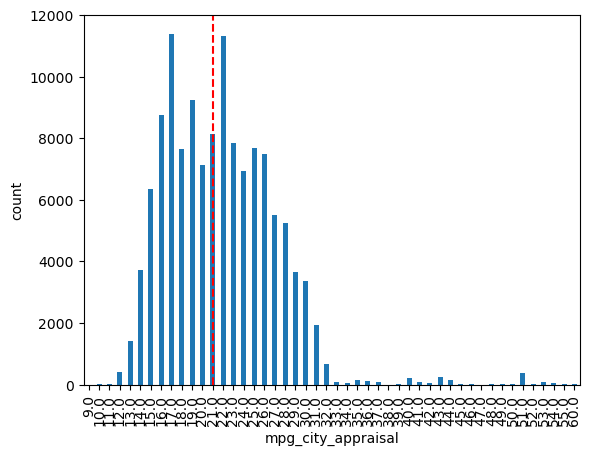

In [700]:
appraised_cars['mpg_city_appraisal'].value_counts().sort_index().plot(kind='bar')
plt.vlines(x=12, ymin=0, ymax = 12000, ls='--', color='r')
plt.xlabel('mpg_city_appraisal')
plt.ylabel('count')
plt.ylim(0,12000);

In [701]:
# mpg_highway_appraisal
np.sort(appraised_cars['mpg_highway_appraisal'].unique())

array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
       30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 54])

In [702]:
# median mpg_highway_appraisal
appraised_cars['mpg_highway_appraisal'].median()

29.0

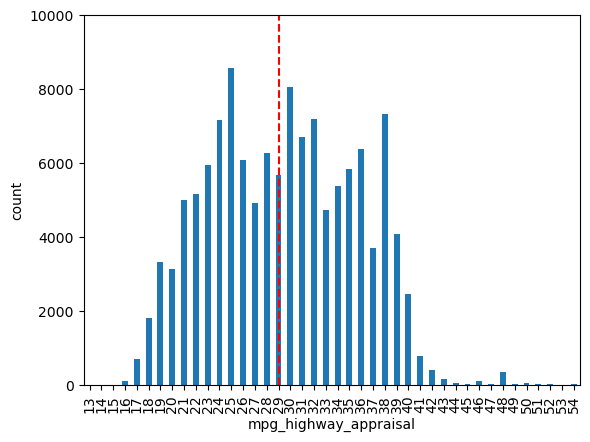

In [704]:
appraised_cars['mpg_highway_appraisal'].value_counts().sort_index().plot(kind='bar')
plt.vlines(x=16, ymin=0, ymax = 10000, ls='--', color='r')
plt.xlabel('mpg_highway_appraisal')
plt.ylabel('count')
plt.ylim(0,10000);

In [705]:
# horsepower
appraised_cars['horsepower_appraisal'].nunique()

272

In [706]:
appraised_cars['horsepower_appraisal'].median()

185.0

In [42]:
appraised_cars['horsepower_appraisal'].value_counts().iloc[:10]

170    6305
182    4471
138    3718
160    3233
290    3105
175    3011
185    2991
283    2576
140    2475
285    2356
Name: horsepower_appraisal, dtype: int64

In [538]:
# fuel_capacity_appraisal
np.sort(appraised_cars['fuel_capacity_appraisal'].unique())

array([ 7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.,
       20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32.,
       33., 34., 35., 36., 37., 38., 39., 48.])

In [708]:
appraised_cars['fuel_capacity_appraisal'].median()

18.0

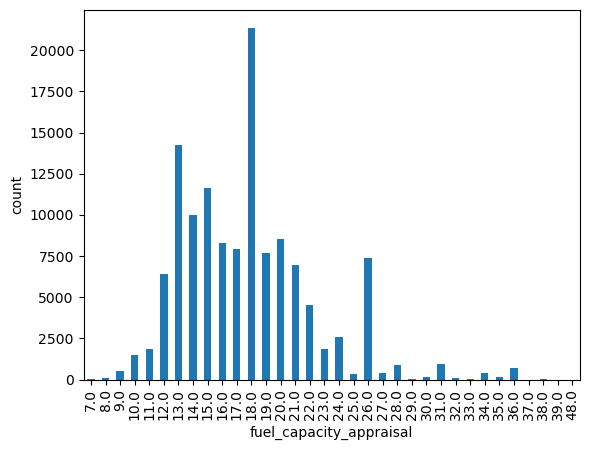

In [709]:
appraised_cars['fuel_capacity_appraisal'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('fuel_capacity_appraisal')
plt.ylabel('count');

## Purchased cars

In [43]:
purchased_columns = [col for col in customer_df_noNaN.columns.values if 'appraisal' not in col]

In [44]:
purchased_columns.remove('market')

In [40]:
purchased_columns

['price',
 'model_year',
 'mileage',
 'make',
 'model',
 'trim_descrip',
 'body',
 'color',
 'engine',
 'cylinders',
 'mpg_city',
 'mpg_highway',
 'horsepower',
 'fuel_capacity']

In [45]:
purchased_cars = customer_df_noNaN[purchased_columns]

In [42]:
purchased_cars.head()

,price,model_year,mileage,make,model,trim_descrip,body,color,engine,cylinders,mpg_city,mpg_highway,horsepower,fuel_capacity
1,$15k to $20k,2006.0,100k+ miles,KQZ,KQZ_23,Premium,E,Silver,3.5L,6,19.0,27.0,285,18.0
4,$30k to $35k,2011.0,35k to 40k miles,HDT,HDT_8,Premium,F,Blue,2.5L,4,17.0,23.0,305,15.0
5,$15k to $20k,2013.0,35k to 40k miles,OFW,OFW_11,Not Premium,F,White,2.4L,4,25.0,35.0,185,18.0
6,$35k to $40k,2013.0,20k to 25k miles,LTX,LTX_21,Premium,B,Blue,6.2L,8,16.0,25.0,455,19.0
7,$15k to $20k,2012.0,30k to 35k miles,LTX,LTX_30,Not Premium,E,Black,1.4L,4,24.0,30.0,138,14.0


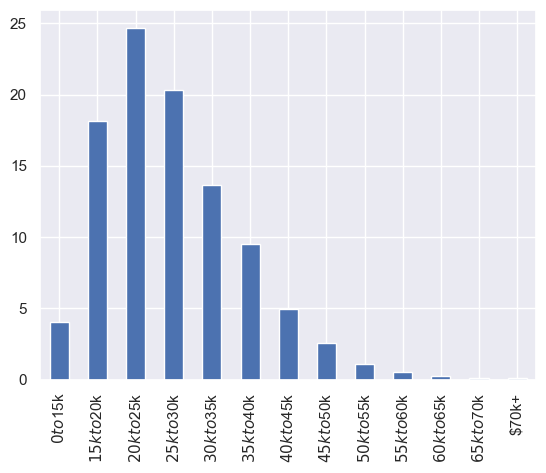

In [43]:
# price
(purchased_cars['price'].value_counts()/len(purchased_cars['price'])*100).sort_index().plot(kind='bar');

In [57]:
(purchased_cars['price'].value_counts()/len(purchased_cars['price'])*100).iloc[:4]

$20k to $25k    24.698449
$25k to $30k    20.325178
$15k to $20k    18.124942
$30k to $35k    13.628874
Name: price, dtype: float64

In [551]:
# model_year
purchased_cars['model_year'] = purchased_cars['model_year'].astype(int)

/var/folders/j7/hwph9dvj1x7frlns2v49lv6r0000gn/T/ipykernel_60499/388890363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchased_cars['model_year'] = purchased_cars['model_year'].astype(int)


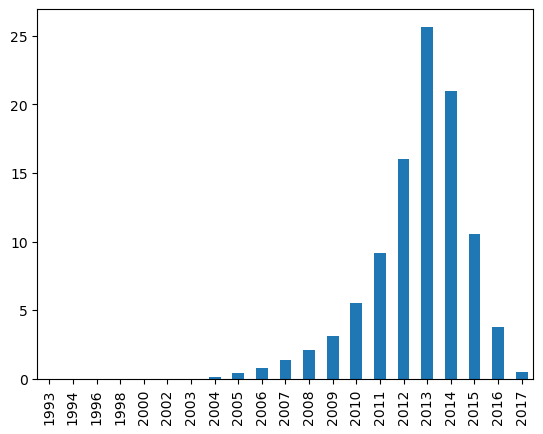

In [552]:
(purchased_cars['model_year'].value_counts()/len(purchased_cars)*100).sort_index().plot(kind='bar');

In [53]:
(purchased_cars['model_year'].value_counts()/len(purchased_cars)*100).iloc[:5]

2013.0    25.647403
2014.0    20.947710
2012.0    15.989990
2015.0    10.548077
2011.0     9.149905
Name: model_year, dtype: float64

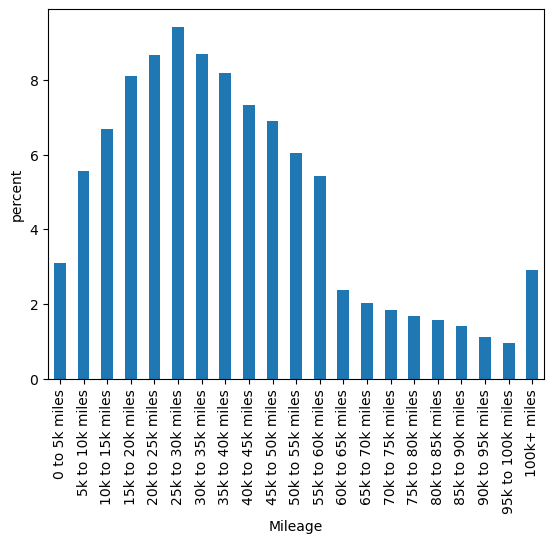

In [555]:
# mileage
df = purchased_cars.copy()
mileage_natsorted_idx = natsorted(df['mileage'].value_counts().index)
df['mileage'] = pd.Categorical(df['mileage'], mileage_natsorted_idx)
(df['mileage'].value_counts()/len(df)*100).sort_index().plot(kind='bar')
plt.ylabel('percent')
plt.xlabel('Mileage');

In [556]:
# make_appraisal

# number of car makes
purchased_cars['make'].nunique()

35

In [559]:
# Which brands in the appraisal are not in purchased brands
set(appraised_cars['make_appraisal']) - set(purchased_cars['make'])

{'BIS', 'CJM'}

In [560]:
# Brands in purchase not in appraisal
set(purchased_cars['make']) - set(appraised_cars['make_appraisal'])

set()

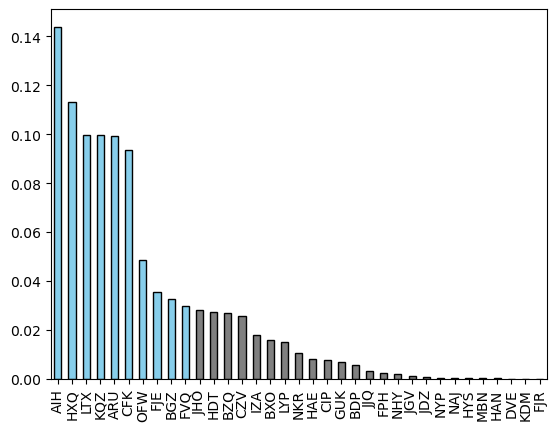

In [21]:
# make with top 10 makes
top10_makes_color = ['skyblue']*10+['gray']*27
(purchased_cars['make'].value_counts()/len(purchased_cars)).plot(kind='bar' , 
                                                                           color = top10_makes_color, edgecolor = 'k');

In [561]:
# Top 10 brands
top_10_purchased_make = (purchased_cars['make'].value_counts()/len(purchased_cars))[:10].index.tolist()

In [562]:
top_10_purchased_make

['AIH', 'HXQ', 'LTX', 'KQZ', 'ARU', 'CFK', 'OFW', 'FJE', 'BGZ', 'FVQ']

In [565]:
# Are the top ten brands purchased same as appraised?
set(top_10_appraised_make) - set(top_10_purchased_make)

set()

In [568]:
# model
purchased_cars['model'].nunique()

342

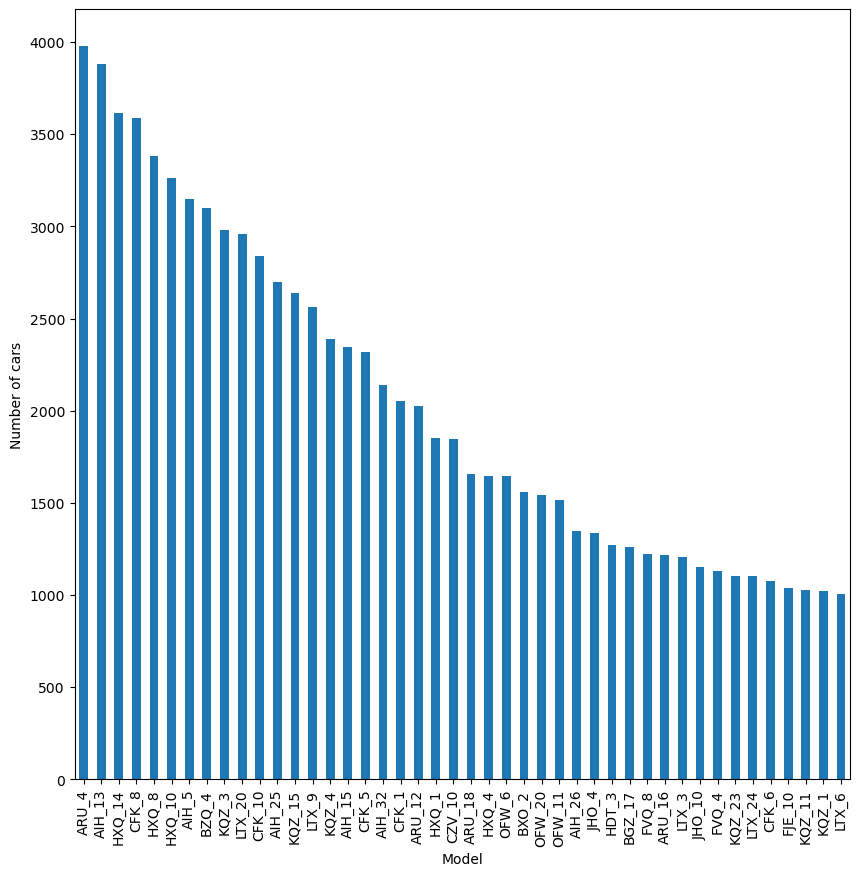

In [566]:
# Car Models with atleast 1000 cars
purchased_cars['model'].value_counts()[purchased_cars['model'].value_counts()>1000].plot(kind='bar',
                                                                                         figsize=(10,10))
plt.xlabel('Model')
plt.ylabel('Number of cars');

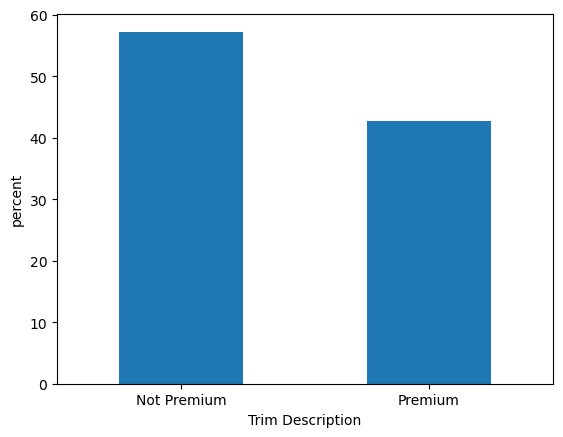

In [23]:
# trim_descrip

(purchased_cars['trim_descrip'].value_counts()/len(purchased_cars)*100).plot(kind='bar')
plt.xlabel('Trim Description')
plt.xticks(rotation=0)
plt.ylabel('percent');

In [49]:
purchased_cars['trim_descrip'].value_counts()/len(purchased_cars)*100

Not Premium    57.227904
Premium        42.772096
Name: trim_descrip, dtype: float64

In [571]:
# body
natsorted(purchased_cars['body'].unique())

['A', 'B', 'D', 'E', 'F', 'G']

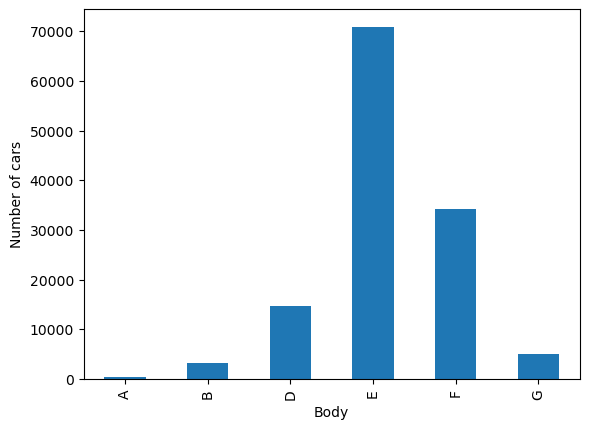

In [572]:
purchased_cars['body'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Body')
plt.ylabel('Number of cars');

In [24]:
purchased_cars['body'].value_counts().sort_index()/len(purchased_cars)

A    0.003349
B    0.025279
D    0.114825
E    0.550562
F    0.266484
G    0.039500
Name: body, dtype: float64

In [573]:
# color

purchased_cars['color'].unique()

array(['Silver', 'Blue', 'White', 'Black', 'Gray', 'Red', 'Gold', 'Brown',
       'Burgundy', 'Green', 'Pearl', 'Purple', 'Orange', 'Tan', 'Yellow',
       'Unknown'], dtype=object)

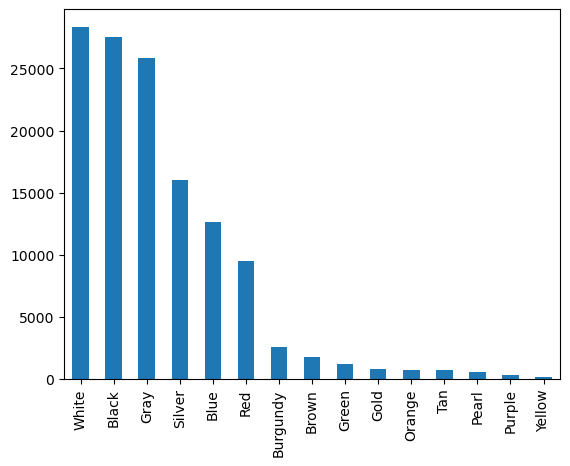

In [576]:
# car colors

purchased_cars.loc[purchased_cars['color']!='Unknown','color'].value_counts()\
.plot(kind='bar');

In [580]:
# engine
# nominal variable
np.sort(purchased_cars['engine'].unique())

array(['1.0L', '1.2L', '1.3L', '1.4L', '1.5L', '1.6L', '1.8L', '2.0L',
       '2.2L', '2.3L', '2.4L', '2.5L', '2.7L', '2.8L', '2.9L', '3.0L',
       '3.2L', '3.3L', '3.5L', '3.6L', '3.7L', '3.8L', '3.9L', '4.0L',
       '4.3L', '4.4L', '4.6L', '4.7L', '4.8L', '5.0L', '5.2L', '5.3L',
       '5.4L', '5.6L', '5.7L', '5.8L', '6.0L', '6.2L', '6.4L'],
      dtype=object)

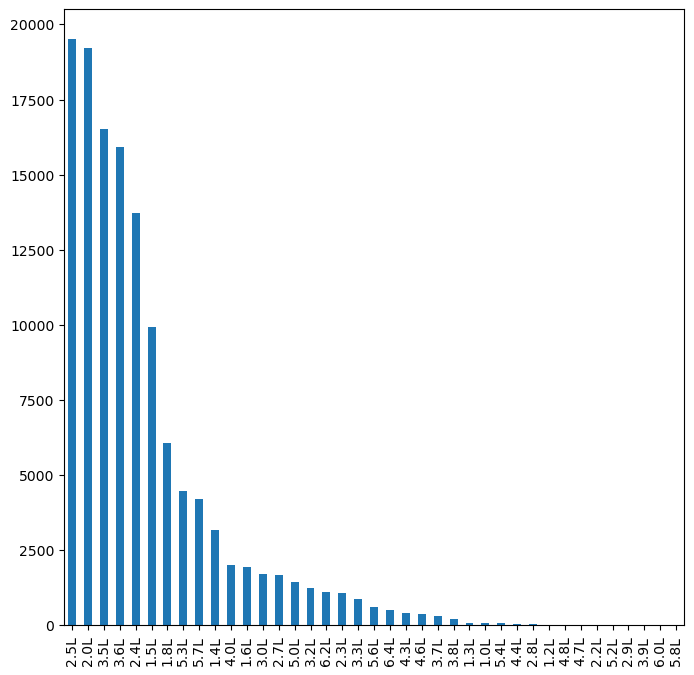

In [581]:
purchased_cars['engine'].value_counts().plot(kind='bar', figsize=(8,8));

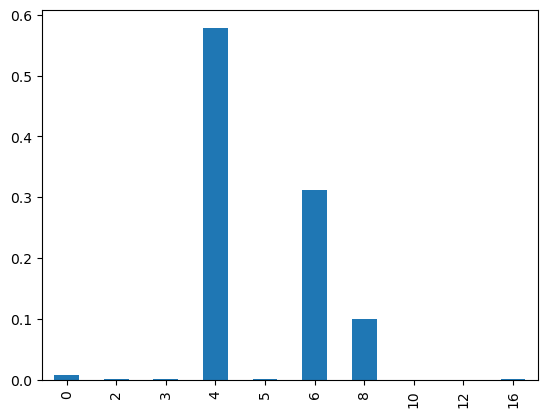

In [582]:
# cylinders

(purchased_cars['cylinders'].value_counts()/len(purchased_cars)).sort_index().plot(kind='bar');

In [59]:
(purchased_cars['cylinders'].value_counts()/len(purchased_cars))

4     0.579282
6     0.311359
8     0.099356
0     0.007072
3     0.001391
5     0.000995
2     0.000435
16    0.000070
12    0.000023
10    0.000016
Name: cylinders, dtype: float64

In [584]:
# mpg_city
np.sort(purchased_cars['mpg_city'].unique())

array([11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.,
       24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36.,
       37., 38., 39., 40., 41., 42., 43., 44., 46., 47., 48., 49., 51.,
       53., 55.])

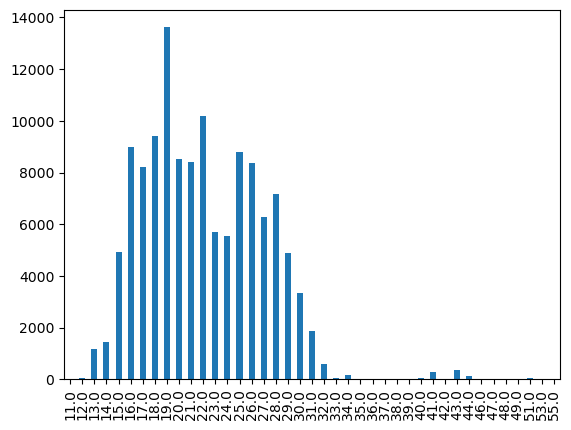

In [585]:
purchased_cars['mpg_city'].value_counts().sort_index().plot(kind='bar');

In [47]:
np.median(purchased_cars['mpg_city'])

21.0

In [586]:
# mpg_highway
np.sort(purchased_cars['mpg_highway'].unique())

array([14., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
       28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40.,
       41., 42., 43., 44., 45., 46., 47., 48., 49., 52., 53.])

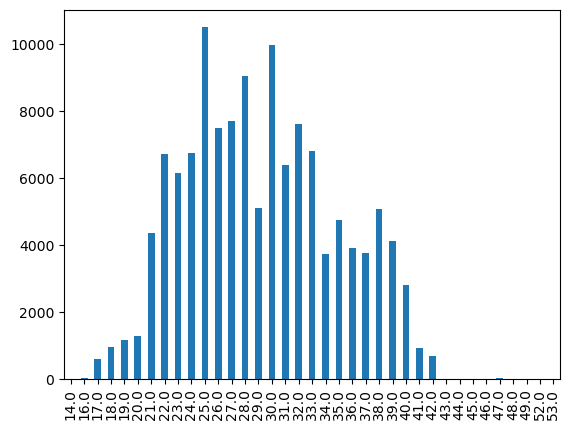

In [587]:
purchased_cars['mpg_highway'].value_counts().sort_index().plot(kind='bar');

In [46]:
np.median(purchased_cars['mpg_highway'])

29.0

In [588]:
# horsepower
purchased_cars['horsepower'].unique()

array([285, 305, 185, 455, 138, 310, 170, 271, 141, 245, 180, 196, 158,
       190, 219, 281, 147, 381, 365, 132, 240, 288, 166, 150, 184, 182,
       268, 355, 280, 203, 248, 124, 192, 189, 212, 395, 293, 178, 295,
       260, 187, 181, 179, 290, 278, 283, 160, 159, 270, 228, 200, 308,
       176, 426, 250, 194, 291, 177, 420, 264, 287, 152, 302, 213, 227,
       175, 255, 157, 300, 296, 292, 252, 320, 168, 201, 143, 485, 301,
       155, 172, 261, 173, 317, 174, 237, 153, 266, 325, 360, 335, 130,
       145, 188, 140, 277, 220, 276, 115, 149, 128, 265, 375, 148, 231,
       235, 151, 193, 256, 109, 139, 284, 221, 340, 120, 162, 144, 241,
       385, 191, 206, 390, 122, 198, 460, 333, 323, 164, 275, 304, 161,
       169, 236, 205, 208, 282, 273, 186, 435, 121, 450, 370, 230, 580,
       202, 316, 318, 197, 137, 303, 354, 243, 403, 400, 315, 156, 279,
       312, 328, 244, 146, 224, 411, 259, 217, 125, 274, 215, 211, 306,
       272, 363, 550, 332,  78, 380, 210, 171, 412, 445, 372, 35

In [589]:
purchased_cars['horsepower'].median()

206.0

In [590]:
purchased_cars['horsepower'].value_counts().iloc[:10]

170    7985
185    4359
355    4316
180    3368
290    3123
280    3119
203    3090
310    3075
395    3049
184    2969
Name: horsepower, dtype: int64

In [591]:
# fuel_capacity_appraisal
np.sort(purchased_cars['fuel_capacity'].unique())

array([ 7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.,
       20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32.,
       33., 34., 36., 38.])

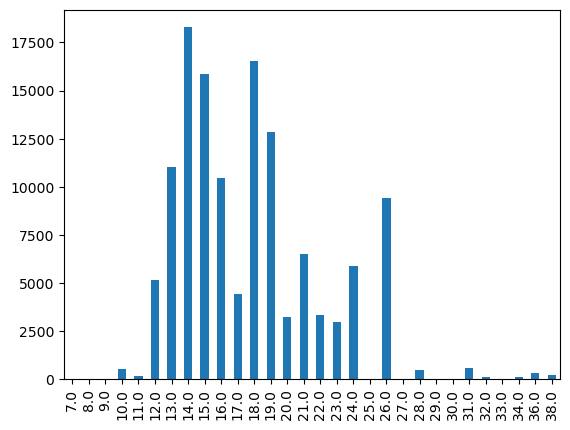

In [592]:
purchased_cars['fuel_capacity'].value_counts().sort_index().plot(kind='bar');

In [45]:
np.median(purchased_cars['fuel_capacity'])

17.0